In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score,GridSearchCV,RandomizedSearchCV,train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
import math

In [3]:
train=pd.read_csv('train_2v.csv')
test=pd.read_csv('test_2v.csv')

In [4]:
train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [5]:
train.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [6]:
train['bmi'].median()

27.7

In [7]:
train.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [8]:
train.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.012760,0.006571,0.009234,0.024634,0.018839,0.002976
age,0.012760,1.000000,0.272169,0.250188,0.237627,0.358897,0.156049
hypertension,0.006571,0.272169,1.000000,0.119777,0.160211,0.161225,0.075332
heart_disease,0.009234,0.250188,0.119777,1.000000,0.146938,0.057677,0.113763
avg_glucose_level,0.024634,0.237627,0.160211,0.146938,1.000000,0.191295,0.078917
bmi,0.018839,0.358897,0.161225,0.057677,0.191295,1.000000,0.020285
stroke,0.002976,0.156049,0.075332,0.113763,0.078917,0.020285,1.000000


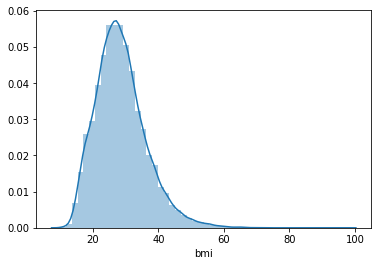

In [9]:
sns.distplot(train[train['bmi'].isnull()==False]['bmi'])

In [10]:
# filling null values of bmi as per age- taking median bmi for that age group

train.loc[(train['bmi'].isnull())&(train['age']>0)&(train['age']<=10),'bmi']=train[(train['age']>0)&(train['age']<=10)]['bmi'].median()
train.loc[(train['bmi'].isnull())&(train['age']>10)&(train['age']<=20),'bmi']=train[(train['age']>10)&(train['age']<=20)]['bmi'].median()
train.loc[(train['bmi'].isnull())&(train['age']>20)&(train['age']<=30),'bmi']=train[(train['age']>20)&(train['age']<=30)]['bmi'].median()
train.loc[(train['bmi'].isnull())&(train['age']>30)&(train['age']<=40),'bmi']=train[(train['age']>30)&(train['age']<=40)]['bmi'].median()
train.loc[(train['bmi'].isnull())&(train['age']>40)&(train['age']<=50),'bmi']=train[(train['age']>40)&(train['age']<=50)]['bmi'].median()
train.loc[(train['bmi'].isnull())&(train['age']>50)&(train['age']<=60),'bmi']=train[(train['age']>50)&(train['age']<=60)]['bmi'].median()
train.loc[(train['bmi'].isnull())&(train['age']>60)&(train['age']<=70),'bmi']=train[(train['age']>60)&(train['age']<=70)]['bmi'].median()
train.loc[(train['bmi'].isnull())&(train['age']>70)&(train['age']<=80),'bmi']=train[(train['age']>70)&(train['age']<=80)]['bmi'].median()
train.loc[(train['bmi'].isnull())&(train['age']>80)&(train['age']<=90),'bmi']=train[(train['age']>80)&(train['age']<=90)]['bmi'].median()

In [11]:
train['stroke'].value_counts(1)

0    0.981959
1    0.018041
Name: stroke, dtype: float64

In [12]:
train['smoking_status'].value_counts()

never smoked       16053
formerly smoked     7493
smokes              6562
Name: smoking_status, dtype: int64

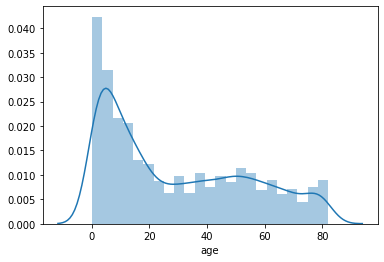

In [13]:
sns.distplot(train[train['smoking_status'].isnull()]['age'])

In [14]:
train[train['smoking_status']!='never smoked']['age']

0         3.0
2         8.0
3        70.0
4        14.0
5        47.0
         ... 
43391     6.0
43392    18.0
43394    47.0
43396    56.0
43397    82.0
Name: age, Length: 27347, dtype: float64

In [15]:
train[train['age']<20]['smoking_status'].value_counts(dropna=False)

NaN                6444
never smoked       1621
formerly smoked     269
smokes              177
Name: smoking_status, dtype: int64

In [16]:
# Since more than 80% of population below 20 dont smoke-hence fillign null as 'never smoked' for them

train.loc[(train['smoking_status'].isnull())&(train['age']<20),'smoking_status']='never smoked'

In [17]:
pd.crosstab(columns=train['smoking_status'],index=train['work_type'])

smoking_status,formerly smoked,never smoked,smokes
work_type,,,
Govt_job,1091,2333,964
Never_worked,9,152,7
Private,4629,11205,4504
Self-employed,1660,2764,1078
children,104,6043,9


In [18]:
train[train['age']>20]['smoking_status'].value_counts(dropna=False)

never smoked       14169
formerly smoked     7183
NaN                 6724
smokes              6309
Name: smoking_status, dtype: int64

In [19]:
pd.crosstab(columns=train['smoking_status'],index=train['stroke'])

smoking_status,formerly smoked,never smoked,smokes
stroke,,,
0,7272,22211,6429
1,221,286,133


In [20]:
train=train[train['smoking_status'].isnull()==False]

In [21]:
train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,never smoked,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,never smoked,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,never smoked,0


In [22]:
train=train.drop(columns='id')

In [23]:
train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,never smoked,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,never smoked,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,never smoked,0


In [24]:
pd.crosstab(columns=train['gender'],index=train['stroke'])

gender,Female,Male,Other
stroke,,,
0,21143,14760,9
1,362,278,0


In [25]:
pd.crosstab(columns=train['hypertension'],index=train['stroke'])

hypertension,0,1
stroke,,
0,32557,3355
1,463,177


In [26]:
pd.crosstab(columns=train['heart_disease'],index=train['stroke'])

heart_disease,0,1
stroke,,
0,34372,1540
1,498,142


In [27]:
pd.crosstab(columns=train['ever_married'],index=train['stroke'])

ever_married,No,Yes
stroke,,
0,13930,21982
1,65,575


In [28]:
pd.crosstab(columns=train['work_type'],index=train['stroke'])

work_type,Govt_job,Never_worked,Private,Self-employed,children
stroke,,,,,
0,4316,168,19974,5300,6154
1,72,0,364,202,2


In [29]:
pd.crosstab(columns=train['Residence_type'],index=train['stroke'])

Residence_type,Rural,Urban
stroke,,
0,17881,18031
1,314,326


In [30]:
stats.chi2_contingency(pd.crosstab(columns=train['Residence_type'],index=train['stroke']))

(0.10598689524601705,
 0.7447600905878838,
 1,
 array([[17876.41825345, 18035.58174655],
        [  318.58174655,   321.41825345]]))

Since pvalue =0.74 i.e. extremely high much higher than 0.05 - therefore Residence Type is insignificant over stroke

In [31]:
stats.ttest_ind(train[train['stroke']==0]['avg_glucose_level'],train[train['stroke']==1]['avg_glucose_level'])

Ttest_indResult(statistic=-15.665534949719278, pvalue=3.9347335113029286e-55)

In [32]:
train[train['stroke']==0]['avg_glucose_level'].mean(),train[train['stroke']==1]['avg_glucose_level'].mean()

(104.11304577856968, 131.09643749999995)

In [33]:
stats.ttest_ind(train[train['stroke']==0]['bmi'],train[train['stroke']==1]['bmi'])

Ttest_indResult(statistic=-4.664356682038691, pvalue=3.10678408815155e-06)

In [34]:
pd.crosstab(columns=train['smoking_status'],index=train['stroke'])

smoking_status,formerly smoked,never smoked,smokes
stroke,,,
0,7272,22211,6429
1,221,286,133


In [35]:
stats.chi2_contingency(pd.crosstab(columns=train['smoking_status'],index=train['stroke']))

(95.5545321518157,
 1.7807255203596715e-21,
 2,
 array([[ 7361.80280149, 22103.09323703,  6447.10396148],
        [  131.19719851,   393.90676297,   114.89603852]]))

In [36]:
train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,never smoked,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,never smoked,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,never smoked,0


In [37]:
X=train.drop(columns='stroke')
y=train['stroke']

In [38]:
X=pd.get_dummies(X,drop_first=True)

In [39]:
X

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_never smoked,smoking_status_smokes
0,3.0,0,0,95.12,18.0,1,0,0,0,0,0,1,0,1,0
1,58.0,1,0,87.96,39.2,1,0,1,0,1,0,0,1,1,0
2,8.0,0,0,110.89,17.6,0,0,0,0,1,0,0,1,1,0
3,70.0,0,0,69.04,35.9,0,0,1,0,1,0,0,0,0,0
4,14.0,0,0,161.28,19.1,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43395,10.0,0,0,58.64,20.4,0,0,0,0,0,0,1,1,1,0
43396,56.0,0,0,213.61,55.4,0,0,1,0,0,0,0,1,0,0
43397,82.0,1,0,91.94,28.9,0,0,1,0,1,0,0,1,0,0
43398,40.0,0,0,99.16,33.2,1,0,1,0,1,0,0,1,1,0


In [40]:
sc=StandardScaler()

In [41]:
Xscaled=sc.fit_transform(X)

In [42]:
lr=LogisticRegression()

In [43]:
metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [44]:
crossval=cross_val_score(lr,Xscaled,y,cv=5,scoring='roc_auc')

print(crossval.mean())

crossval

0.8568200030884906


array([0.8504629 , 0.85260119, 0.85185403, 0.85471274, 0.87446916])

In [45]:
lr1=LogisticRegression(class_weight={0:0.02,1:0.98})

In [46]:
crossval=cross_val_score(lr1,Xscaled,y,cv=5,scoring='roc_auc')

print(crossval.mean())
crossval

0.85647626793924


array([0.84946336, 0.85337994, 0.84898879, 0.85429503, 0.87625422])

In [47]:
X.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_never smoked,smoking_status_smokes
0,3.0,0,0,95.12,18.0,1,0,0,0,0,0,1,0,1,0
1,58.0,1,0,87.96,39.2,1,0,1,0,1,0,0,1,1,0
2,8.0,0,0,110.89,17.6,0,0,0,0,1,0,0,1,1,0
3,70.0,0,0,69.04,35.9,0,0,1,0,1,0,0,0,0,0
4,14.0,0,0,161.28,19.1,1,0,0,1,0,0,0,0,1,0


In [48]:
train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,never smoked,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,never smoked,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,never smoked,0


In [49]:
# Model building without Residence_Type

train1=train.copy()

In [50]:
train1=train1.drop(columns='Residence_type')

In [51]:
train1.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,95.12,18.0,never smoked,0
1,Male,58.0,1,0,Yes,Private,87.96,39.2,never smoked,0
2,Female,8.0,0,0,No,Private,110.89,17.6,never smoked,0
3,Female,70.0,0,0,Yes,Private,69.04,35.9,formerly smoked,0
4,Male,14.0,0,0,No,Never_worked,161.28,19.1,never smoked,0


In [52]:
X1=train1.drop(columns='stroke')
y1=train1['stroke']

In [53]:
X1=pd.get_dummies(X1)

In [54]:
X1scaled=sc.fit_transform(X1)

In [55]:
crossval=cross_val_score(lr,X1scaled,y,cv=5,scoring='roc_auc')

print(crossval.mean())
crossval

0.8569766422391831


array([0.85056405, 0.85258814, 0.85236311, 0.85492159, 0.87444632])

In [56]:
crossval=cross_val_score(lr1,X1scaled,y,cv=5,scoring='roc_auc')

print(crossval.mean())
crossval

0.8565556662322853


array([0.8498473 , 0.8533658 , 0.84975677, 0.85385991, 0.87594855])

We are getting better scores without assigning weights- however we can try more complex algos- Decision Tree, Random Forest, Boosting

We will be moving ahead without residence_type as it is not significant

In [57]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X1scaled,y,random_state=1,test_size=0.3)

In [58]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
dtc=DecisionTreeClassifier(random_state=1)

In [60]:
from scipy.stats import randint as sp_randint

In [61]:
params={'max_depth':sp_randint(2,10),
       'min_samples_split':sp_randint(2,20),
       'min_samples_leaf':sp_randint(1,20),
       'criterion':['gini','entropy']}

In [62]:
rsearch=RandomizedSearchCV(dtc,param_distributions=params,cv=3,random_state=1)

In [63]:
rsearch.fit(X1scaled,y)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=1,
             

In [64]:
rsearch.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 13,
 'min_samples_split': 10}

In [65]:
dtc=DecisionTreeClassifier(**rsearch.best_params_)

In [66]:
dtc.fit(Xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=13, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [67]:
y_train_pred=dtc.predict(Xtrain)
y_train_prob=dtc.predict_proba(Xtrain)[:,1]

y_test_pred=dtc.predict(Xtest)
y_test_prob=dtc.predict_proba(Xtest)[:,1]

print('Accuracy of Train: ', metrics.accuracy_score(ytrain,y_train_pred))
print('Accuracy of Test: ', metrics.accuracy_score(ytest,y_test_pred))

print('AUC of Train: ', metrics.roc_auc_score(ytrain,y_train_prob))
print('AUC of Test: ', metrics.roc_auc_score(ytest,y_test_prob))



Accuracy of Train:  0.9822559212069101
Accuracy of Test:  0.9830384825825278
AUC of Train:  0.8740094153091938
AUC of Test:  0.8201917130488559


In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
rfc=RandomForestClassifier(random_state=1)

params={'n_estimators':sp_randint(10,100),
        'max_depth':sp_randint(2,10),
       'min_samples_split':sp_randint(2,20),
       'min_samples_leaf':sp_randint(1,20),
       'criterion':['gini','entropy']}

rsearch=RandomizedSearchCV(rfc,param_distributions=params,cv=3,random_state=1)

rsearch.fit(X1scaled,y)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [70]:
rsearch.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 13,
 'min_samples_split': 10,
 'n_estimators': 19}

In [71]:
rfc=RandomForestClassifier(**rsearch.best_params_)

rfc.fit(Xtrain,ytrain)

y_train_pred=rfc.predict(Xtrain)
y_train_prob=rfc.predict_proba(Xtrain)[:,1]

y_test_pred=rfc.predict(Xtest)
y_test_prob=rfc.predict_proba(Xtest)[:,1]

print('Accuracy of Train: ', metrics.accuracy_score(ytrain,y_train_pred))
print('Accuracy of Test: ', metrics.accuracy_score(ytest,y_test_pred))

print('AUC of Train: ', metrics.roc_auc_score(ytrain,y_train_prob))
print('AUC of Test: ', metrics.roc_auc_score(ytest,y_test_prob))



Accuracy of Train:  0.9822559212069101
Accuracy of Test:  0.9830384825825278
AUC of Train:  0.8766022449922559
AUC of Test:  0.8497805573842441


So far we can se RFC performing better after being hypertuned

{'criterion': 'entropy',

 'max_depth': 5,

'min_samples_leaf': 13,

'min_samples_split': 10,

'n_estimators': 19}

In [72]:
from sklearn.ensemble import AdaBoostClassifier

In [73]:
rf=RandomForestClassifier(criterion= 'entropy',max_depth= 5,min_samples_leaf= 13,min_samples_split= 10,n_estimators= 19)

In [74]:
adc=AdaBoostClassifier(base_estimator=rf,random_state=1)

params={'n_estimators':sp_randint(10,100),
        'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
       }

rsearch=RandomizedSearchCV(adc,param_distributions=params,cv=3,random_state=1)

rsearch.fit(X1scaled,y)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                                base_estimator=RandomForestClassifier(bootstrap=True,
                                                                                      ccp_alpha=0.0,
                                                                                      class_weight=None,
                                                                                      criterion='entropy',
                                                                                      max_depth=5,
                                                                                      max_features='auto',
                                                                                      max_leaf_nodes=None,
                                                                                      max_samples=None,
                                                         

In [75]:
adc=AdaBoostClassifier(**rsearch.best_params_)

adc.fit(Xtrain,ytrain)

y_train_pred=adc.predict(Xtrain)
y_train_prob=adc.predict_proba(Xtrain)[:,1]

y_test_pred=adc.predict(Xtest)
y_test_prob=adc.predict_proba(Xtest)[:,1]

print('Accuracy of Train: ', metrics.accuracy_score(ytrain,y_train_pred))
print('Accuracy of Test: ', metrics.accuracy_score(ytest,y_test_pred))

print('AUC of Train: ', metrics.roc_auc_score(ytrain,y_train_prob))
print('AUC of Test: ', metrics.roc_auc_score(ytest,y_test_prob))



Accuracy of Train:  0.9822559212069101
Accuracy of Test:  0.9830384825825278
AUC of Train:  0.8614803704282795
AUC of Test:  0.8554618768328446


In [81]:
# Recall score for AdaBoost

metrics.recall_score(ytest,adc.predict(Xtest))

0.0

In [82]:
# Recall score for RandomForest

metrics.recall_score(ytest,rfc.predict(Xtest))

0.0

In [76]:
rsearch.best_params_

{'learning_rate': 0.6, 'n_estimators': 22}

In [78]:
Xtrain.shape

(25586, 18)

In [79]:
X1scaled.shape

(36552, 18)

# SMOTE

In [83]:
from imblearn.over_sampling import SMOTE

smote=SMOTE(sampling_strategy='minority',random_state=1)

x_train_sm, y_train_sm=smote.fit_sample(Xtrain, ytrain)

print('len0: ', len(y_train_sm[y_train_sm==0]))
print('len1: ', len(y_train_sm[y_train_sm==1]))

len0:  25132
len1:  25132


In [84]:
rfc=RandomForestClassifier(random_state=1)

params={'n_estimators':sp_randint(10,100),
        'max_depth':sp_randint(2,10),
       'min_samples_split':sp_randint(2,20),
       'min_samples_leaf':sp_randint(1,20),
       'criterion':['gini','entropy']}

rsearch=RandomizedSearchCV(rfc,param_distributions=params,cv=3,scoring='roc_auc',random_state=1)

rsearch.fit(x_train_sm, y_train_sm)





RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [85]:
rsearch.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'min_samples_leaf': 4,
 'min_samples_split': 8,
 'n_estimators': 31}

In [86]:
rfc=RandomForestClassifier(**rsearch.best_params_)

rfc.fit(x_train_sm, y_train_sm)

y_train_pred=rfc.predict(x_train_sm)
y_train_prob=rfc.predict_proba(x_train_sm)[:,1]

y_test_pred=rfc.predict(Xtest)
y_test_prob=rfc.predict_proba(Xtest)[:,1]

print('Accuracy of Train: ', metrics.accuracy_score(y_train_sm,y_train_pred))
print('Accuracy of Test: ', metrics.accuracy_score(ytest,y_test_pred))

print('AUC of Train: ', metrics.roc_auc_score(y_train_sm,y_train_prob))
print('AUC of Test: ', metrics.roc_auc_score(ytest,y_test_prob))



Accuracy of Train:  0.8628441827152634
Accuracy of Test:  0.8043954039759256
AUC of Train:  0.941085649182471
AUC of Test:  0.8419257585732239


In [87]:
metrics.recall_score(ytest,rfc.predict(Xtest))

0.7043010752688172

In [88]:
metrics.precision_score(ytest,rfc.predict(Xtest))

0.058982440342188205

However, our overall accuracy might have decreased but we see substantial jump of recall score after applying smote.

We need to ensure that we are correctly able to identify patients who may heart stroke.

Since our data was biased towards 0-i.e. no heart stroke, our results also seemed accordingly.